<a href="https://colab.research.google.com/github/SOUMYAJYOTI1234/Sparks-project/blob/main/Sparks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The Sparks Foundation Data Science and Business Analytics Internship      
NAME : SOUMYAJYOTI CHATTERJEE     
TASK : PREDICTION USING SUPERVISED ML    
BATCH : JANUARY 2024


In [ ]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [ ]:
# Importing Data
url ='https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'
df = pd.read_csv(url)
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


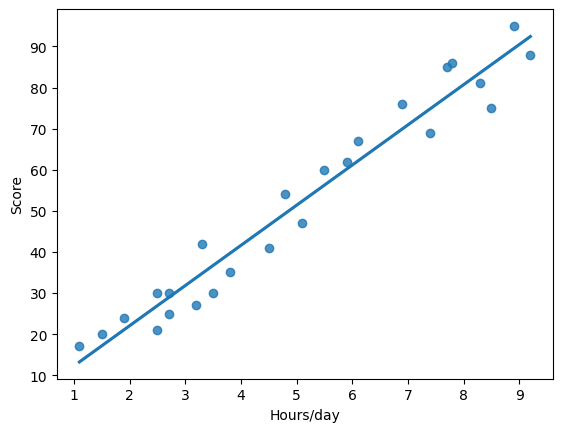

In [ ]:
# Visualization of Data
sns.regplot(data=df, x='Hours', y='Scores', ci=None)
plt.xlabel('Hours/day')
plt.ylabel('Score')
plt.show()

The above graph shows the correlation is positive between Hours and Scores.       
Let's confirm it by creating a correlation matrix

In [ ]:
df.corr()


,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


There is very strong positive correlation between the variables.

In [ ]:
# Splitting the Data in inputs(x) and outputs(y)

# Inputs
x = df['Hours'].values.reshape(-1,1)

#Outputs
y = df['Scores'].values.reshape(-1,1)

In [ ]:
# Create training and text sets
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

Creating a Regressor named 'reg' and train it using fit


In [ ]:
# Create the regressor:reg_all
reg = LinearRegression()

# Fit the regressor to the training Data
reg.fit(x_train,y_train)

print('Model Trained')


Model Trained


Predict values

In [ ]:
y_pred = reg.predict(x_test)
y_test.shape

(5, 1)

In [ ]:
# Comparing actual with predicted
new_df = pd.DataFrame({'Actual':y_test.flatten(), 'Predicted':y_pred.flatten()})
new_df

,Actual,Predicted
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


Now what will be the score of the student that studies 9.25 hrs/day?

In [ ]:
hours = np.array(9.25).reshape(-1,1)
predicted = reg.predict(hours)
print(f'''
No of hours: {hours.flatten()[0]}
Marks predicted: {predicted.flatten()[0]}''')



No of hours: 9.25
Marks predicted: 92.38611528261494


Evaluate the Model

In [ ]:
print("R^2: {}",format(reg.score(x_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error: {}",format(rmse))

R^2: {} 0.9678055545167994
Root Mean Squared Error: {} 4.352380006653288
